# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
Combined_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice.
mouse_id = Combined_df["Mouse ID"].nunique()
mouse_id


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

unique_data= Combined_df[Combined_df.duplicated(subset=['Mouse ID','Timepoint'])]
unique_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = Combined_df.loc[Combined_df['Mouse ID'] == 'g989']
duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_data= Combined_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep= False)
cleaned_data = Combined_df.loc[Combined_df['Mouse ID'] != 'g989']
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_id = cleaned_data["Mouse ID"].nunique()
cleaned_mouse_id

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean =cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median =cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Variance =cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Standard_Deviation= cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Sem =cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
data = {
    'Mean': Mean,
    'Median': Median,
    'Variance': Variance,
    'Standard_Deviation': Standard_Deviation,
    'SEM': Sem
}

Summary_data = pd.DataFrame(data)

Summary_data
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_data = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
summary_stats = grouped_data.agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

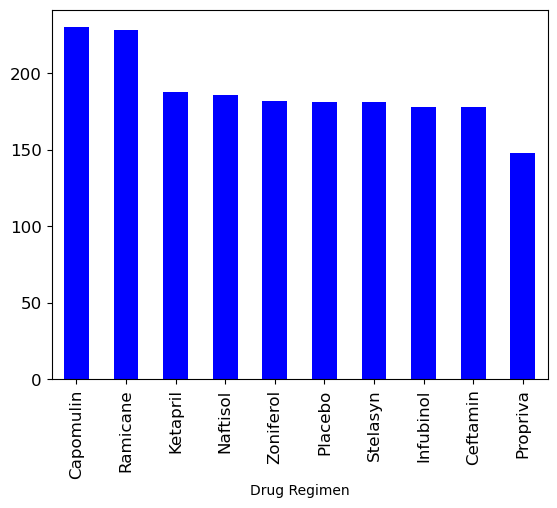

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#plt.bar (("Drug Regimen"),len("Timepoint"), color = 'r', alpha =0.5) 
#plt.show()
Total_Rows = cleaned_data["Drug Regimen"].value_counts()
Total_Rows. plot. bar(x = 'Drug Regimen', y = 'Total_Rows', color='b', fontsize='12')


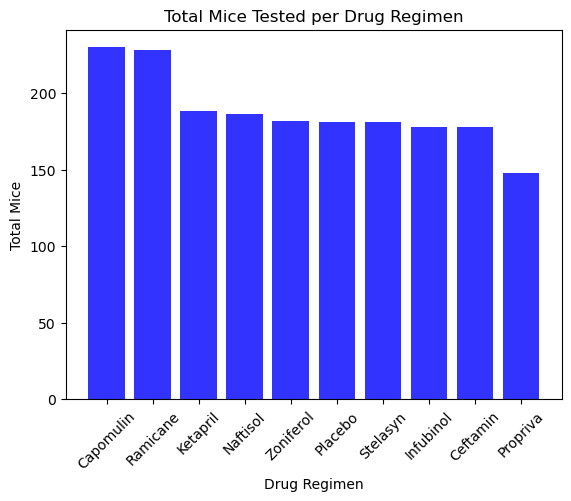

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = Total_Rows.index.values
y_axis = Total_Rows.values
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Total Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.xticks(rotation=45)

plt.show()

plt.show()

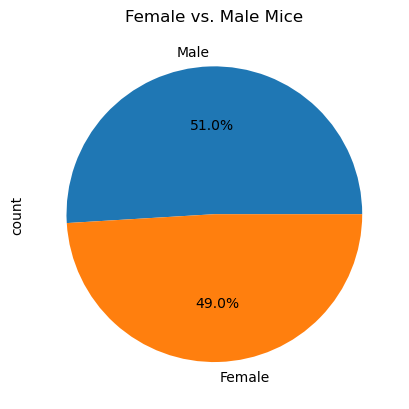

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Female_male_data = cleaned_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
Female_male_data.plot.pie(autopct= "%1.1f%%")
plt.show()


In [12]:
Female_male_data = cleaned_data["Sex"].value_counts()
Female_male_data

Sex
Male      958
Female    922
Name: count, dtype: int64

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

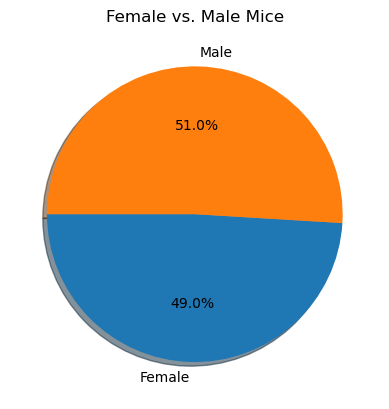

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels= ['Female', 'Male']
Sizes= [922, 958]

plt.pie(Sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Female vs. Male Mice")
plt.pie

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Four_regimens_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume = Four_regimens_data.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)'].last().reset_index()
final_tumor_volume

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [15]:

# Start by getting the last (greatest) timepoint for each mouse
Greatest_timepoint = cleaned_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

Greatest_timepoint 




,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = Greatest_timepoint.merge(cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)


treatment_regimens =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']   



# Create empty list to fill with tumor vol data (for plotting)
Tumor_Volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatment_regimens:
    
    
       # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen,'Tumor Volume (mm3)']
        # add subset
    Tumor_Volume_data.append(regimen_data)
    # Determine outliers using upper and lower bounds
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
      
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    
  
    




    
 

    
 

    
  


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


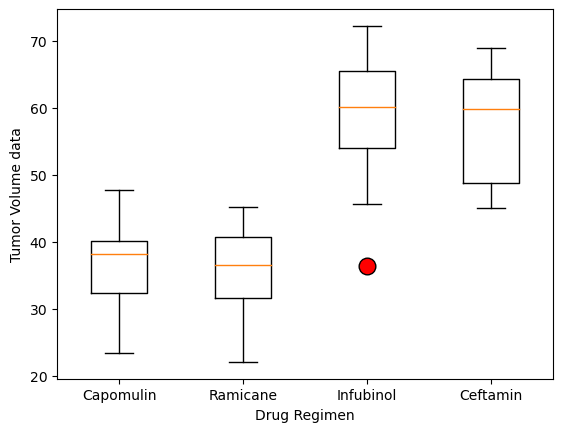

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#green_line =dict(markerfacecolor="green")
red =dict(markerfacecolor = "red", markersize = 12)
plt.boxplot(Tumor_Volume_data, labels= treatment_regimens, flierprops= red )
plt.ylabel("Tumor Volume data")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

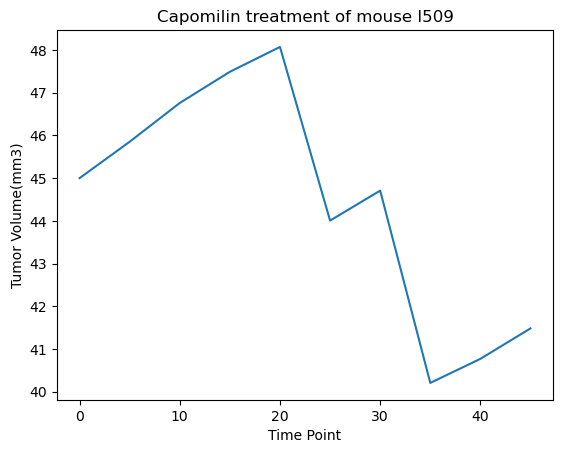

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df =cleaned_data.loc[cleaned_data["Drug Regimen"] == 'Capomulin']
Mouse_df=  Capomulin_df.loc[Capomulin_df["Mouse ID"] =='l509']
#Tumor_Volume = me_data.loc[Capomulin, Mouse, 'Tumor Volume (mm3)']
#time_point = merged_data.loc[merged_data["Drug Regimen"] == 'Capomulin',["Mouse ID"] =='1509', 'Timepoint']
#x_axis = Mouse_df['Timepoint']
#y_axis = Mouse_df['Tumor Volume (mm3)']
#plt.plot(x_axis, y_axis, color = "blue", linewidth =2)
plt.plot(Mouse_df['Timepoint'],Mouse_df['Tumor Volume (mm3)'])
plt.title("Capomilin treatment of mouse l509")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume(mm3)")

plt.show()






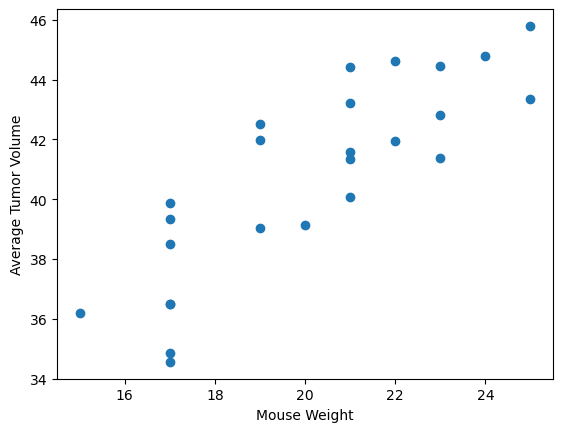

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_df =cleaned_data.loc[cleaned_data["Drug Regimen"] == 'Capomulin']
capomulin_average = Capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

x_axis =capomulin_average['Weight (g)']
y_axis =capomulin_average['Tumor Volume (mm3)']
plt.scatter(x_axis,y_axis)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()




## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(capomulin_average ['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


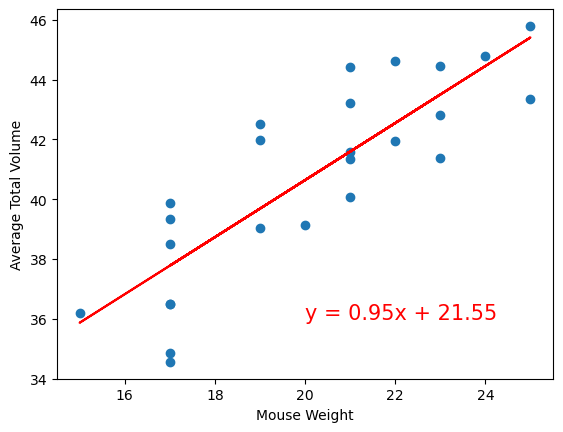

In [33]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Total Volume')
plt.show()


